In [21]:
import random
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd

from src.vitaldb.fetchingstrategy.Sdk import Sdk
from src.vitaldb.casegenerator import VitalDBGenerator, VitalFileOptions
import src.preprocessing.preprocessing as preprocessing


import tensorflow as tf
import matplotlib.pyplot as plt
import heartpy as hp
import neurokit2 as nk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
def plot_time_series(time_series, title="Plot"):
    plt.figure(figsize=(40,10))
    plt.title(title)
    plt.plot(time_series)
    plt.savefig("plot.png")
    plt.show()

In [23]:
freq = 500

options = VitalFileOptions(
    ['SNUADC/ART'],
    1/freq
)

vitalDbGenerator = VitalDBGenerator(options, Sdk(), range(1,2))

In [24]:
sample = vitalDbGenerator.next()
sample

array([[ 0.00000000e+00,             nan],
       [ 2.00000000e-03,             nan],
       [ 4.00000000e-03,             nan],
       ...,
       [ 1.15410940e+04, -2.16466007e+01],
       [ 1.15410960e+04, -2.88493991e+00],
       [ 1.15410980e+04,  1.29144001e+01]])

Get blood pressure track

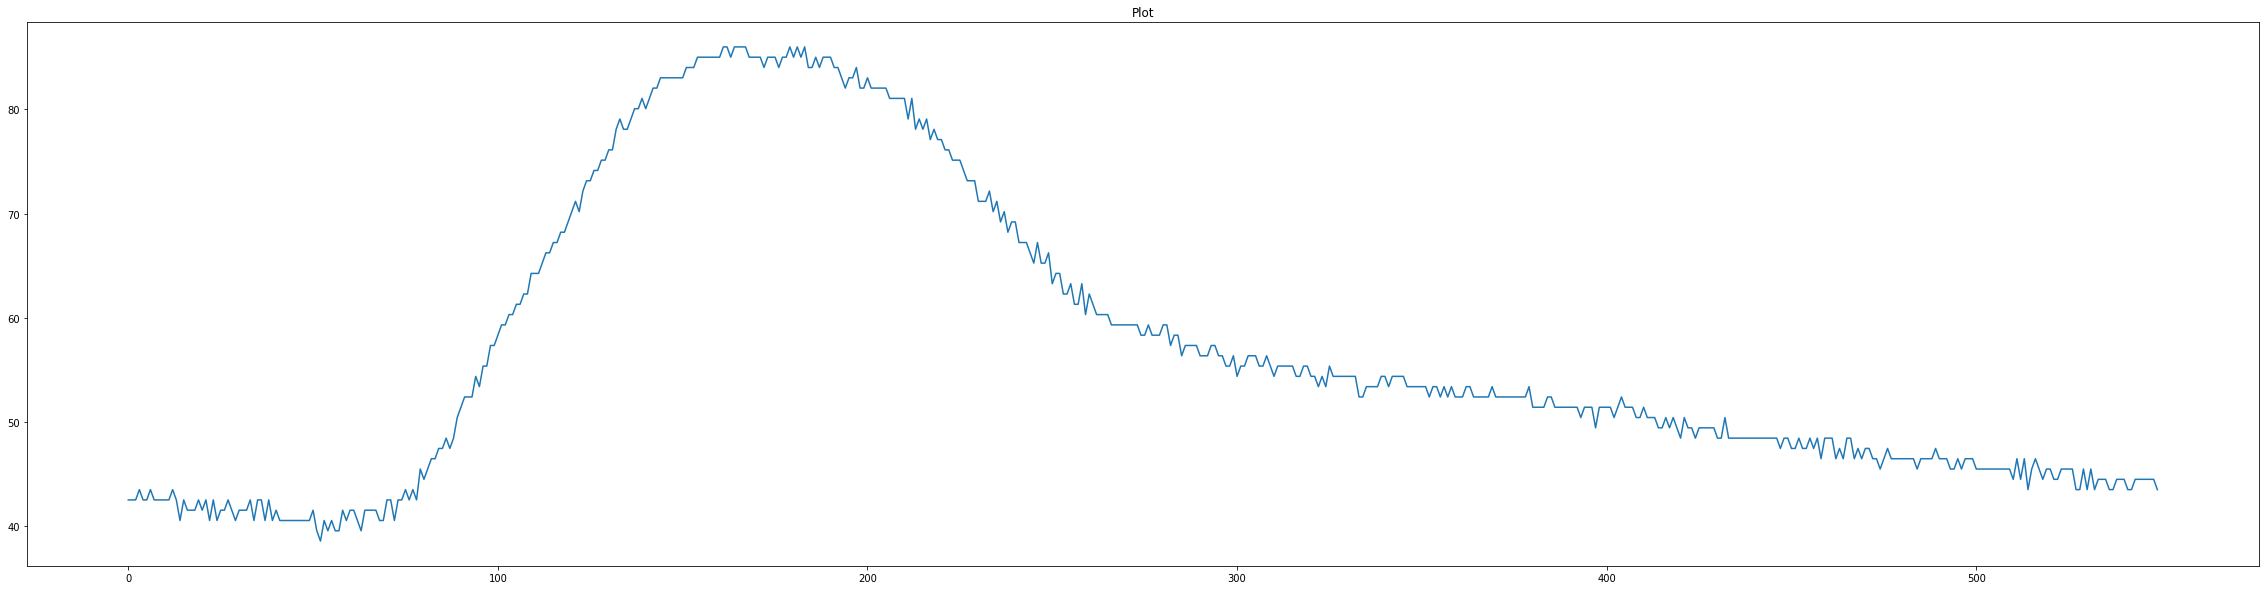

In [26]:
plot_time_series(sample[2500300:2500850,1])

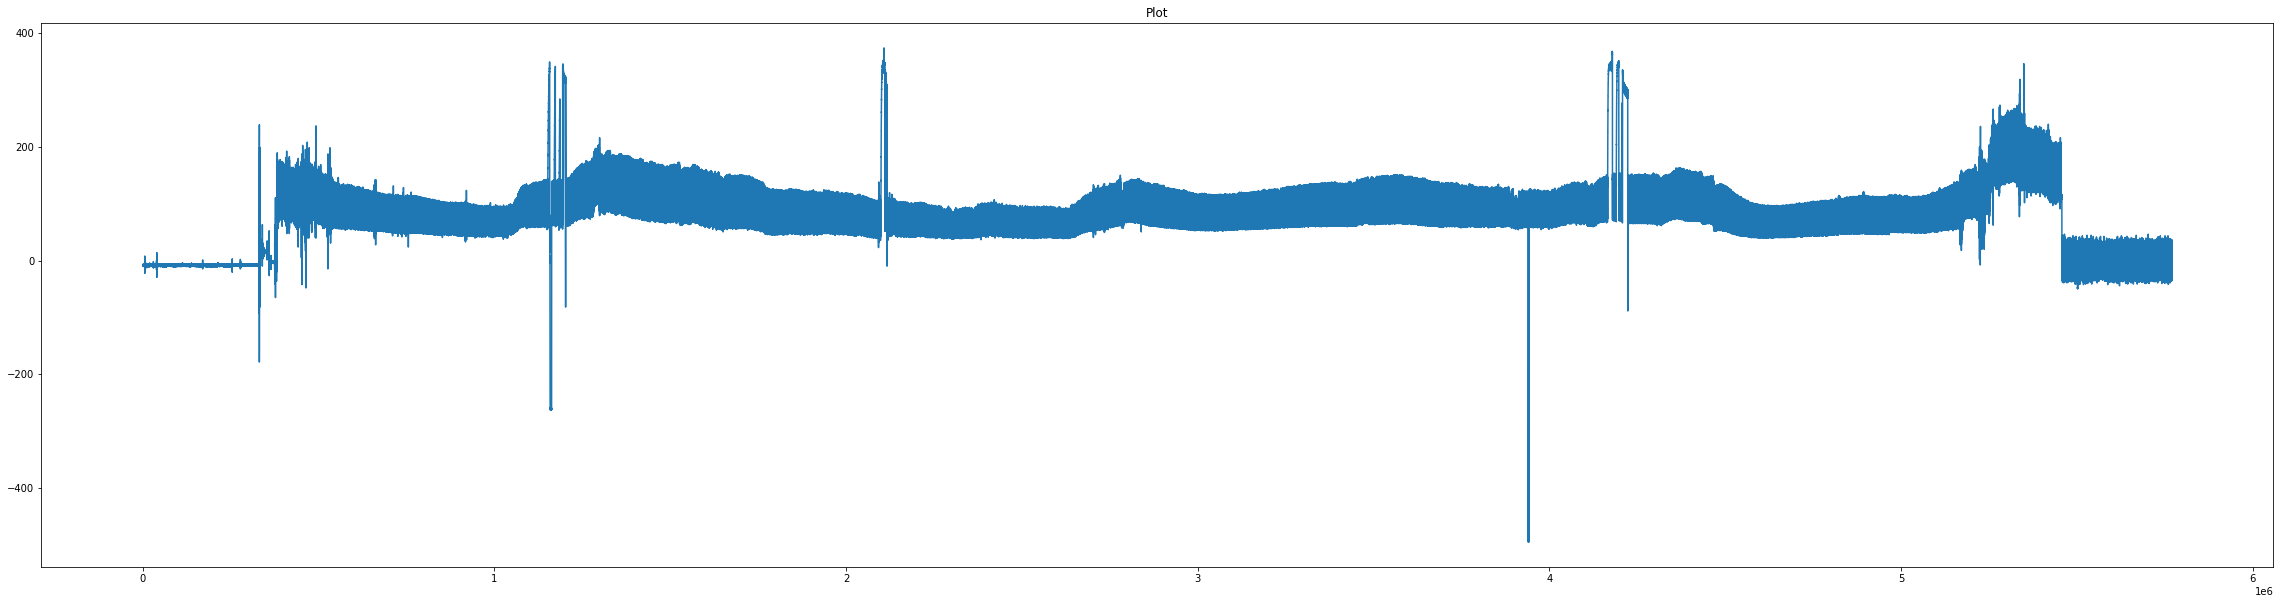

In [5]:
sample_abp = sample[:,1]
plot_time_series(sample_abp)

Trim ends

In [6]:
sample_trimmed = [x for x in sample_abp if not np.isnan(x)]
sample_trimmed

[-7.822229862213135,
 -7.822229862213135,
 -7.822229862213135,
 -9.797140121459961,
 -6.834770202636719,
 -8.809679985046387,
 -6.834770202636719,
 -6.834770202636719,
 -7.822229862213135,
 -6.834770202636719,
 -7.822229862213135,
 -7.822229862213135,
 -7.822229862213135,
 -7.822229862213135,
 -8.809679985046387,
 -7.822229862213135,
 -7.822229862213135,
 -6.834770202636719,
 -6.834770202636719,
 -8.809679985046387,
 -8.809679985046387,
 -7.822229862213135,
 -7.822229862213135,
 -7.822229862213135,
 -8.809679985046387,
 -6.834770202636719,
 -6.834770202636719,
 -7.822229862213135,
 -8.809679985046387,
 -7.822229862213135,
 -8.809679985046387,
 -8.809679985046387,
 -8.809679985046387,
 -6.834770202636719,
 -8.809679985046387,
 -8.809679985046387,
 -7.822229862213135,
 -8.809679985046387,
 -8.809679985046387,
 -7.822229862213135,
 -7.822229862213135,
 -7.822229862213135,
 -8.809679985046387,
 -7.822229862213135,
 -8.809679985046387,
 -6.834770202636719,
 -6.834770202636719,
 -8.809679985

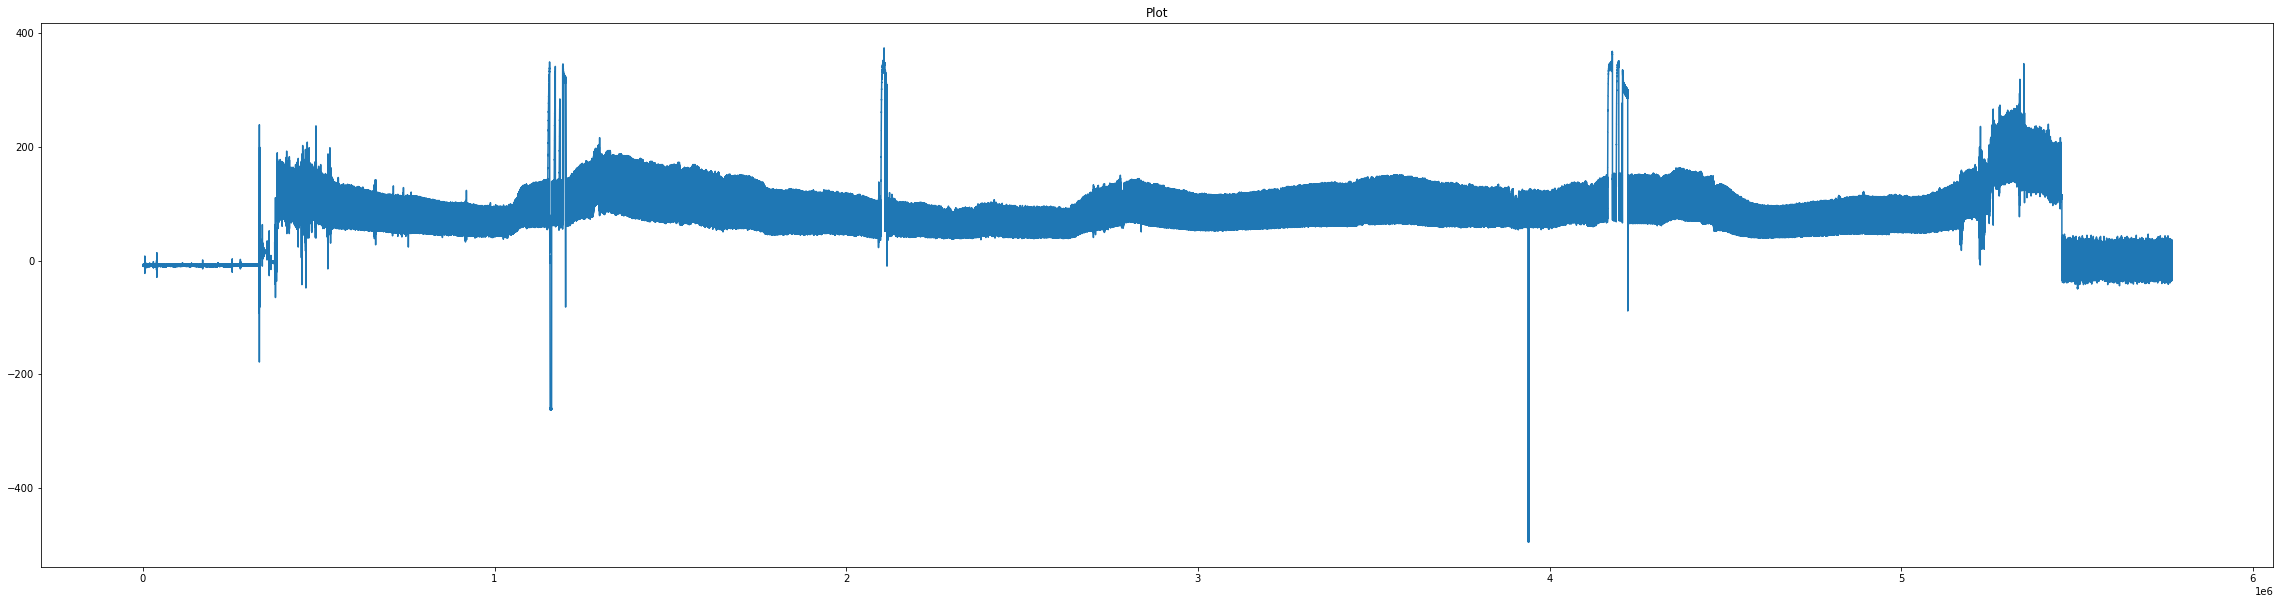

In [7]:
plot_time_series(sample_trimmed)

lowpass filtering

In [8]:
sample_lowpass = hp.filter_signal(sample_trimmed, cutoff=5, sample_rate=freq, filtertype='lowpass')
sample_lowpass

array([-8.15966194, -8.1431532 , -8.1273715 , ...,  2.92154991,
        2.9865    ,  3.04531568])

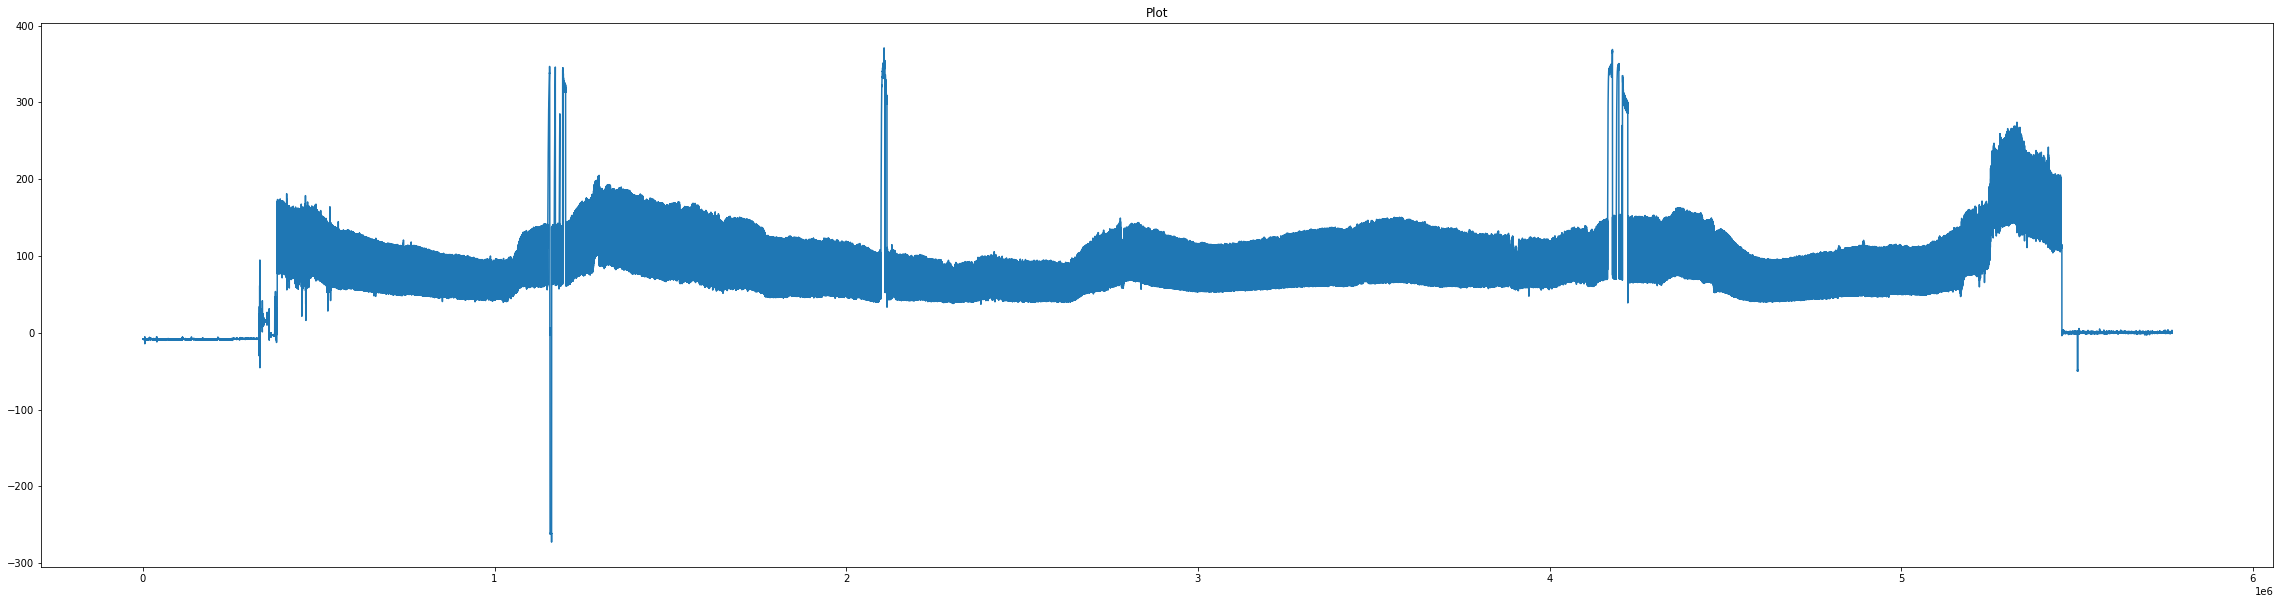

In [9]:
plot_time_series(sample_lowpass)

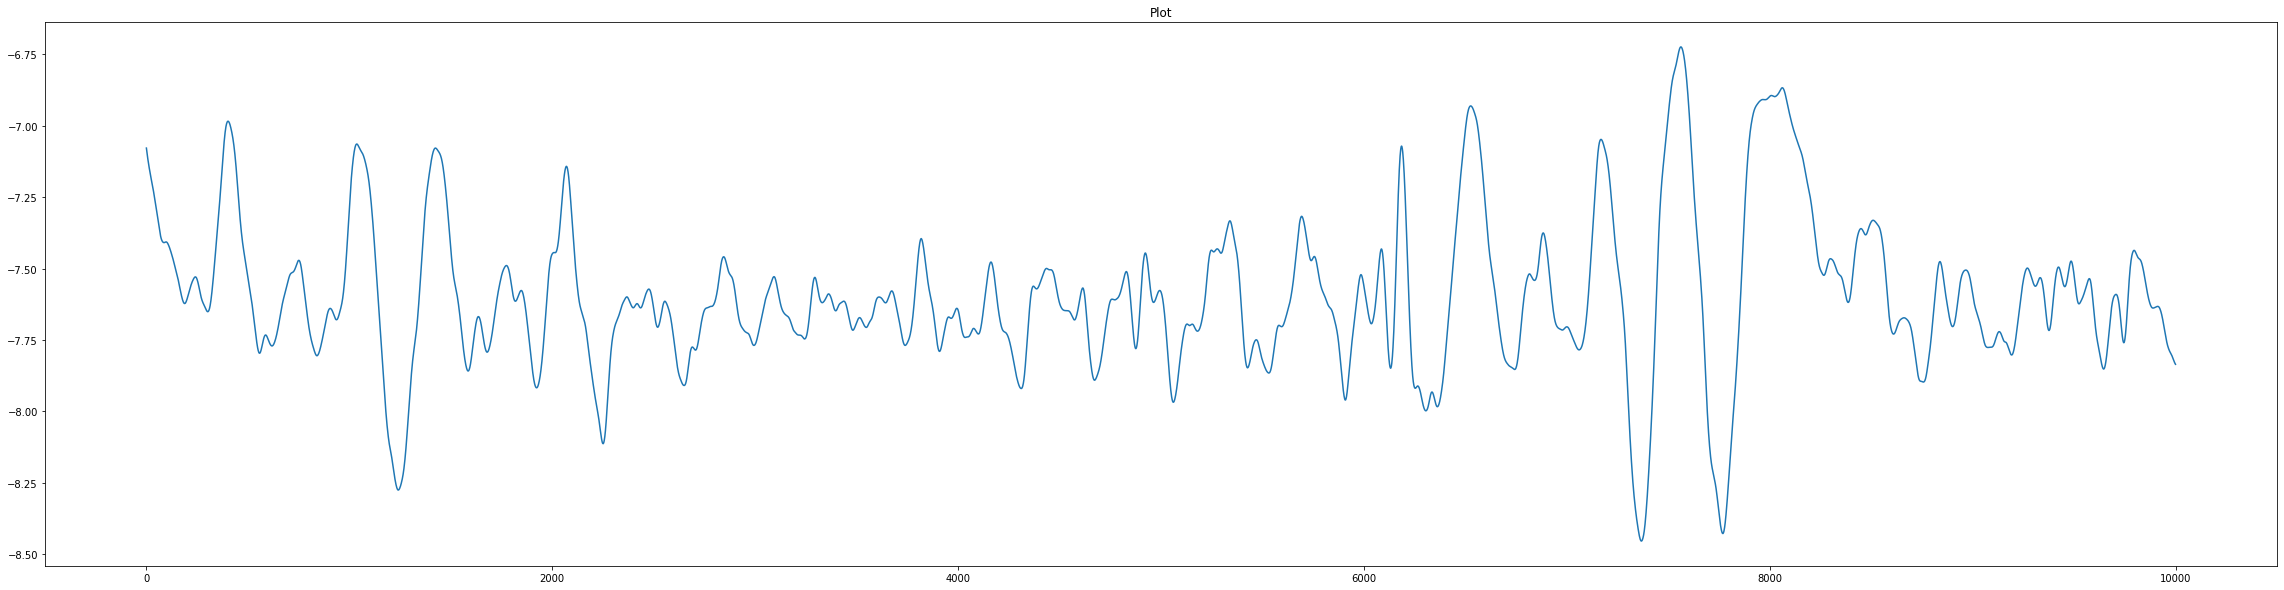

In [10]:
plot_time_series(sample_lowpass[300000:310000])

Extract clean windows

In [21]:
working_data, measures = hp.process_segmentwise(sample_lowpass, freq, segment_width=8, segment_overlap=0.25)
working_data

/Users/francois/Library/Caches/pypoetry/virtualenvs/bpbaseline-d4rfio-H-py3.10/lib/python3.10/site-packages/scipy/interpolate/_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
/Users/francois/Library/Caches/pypoetry/virtualenvs/bpbaseline-d4rfio-H-py3.10/lib/python3.10/site-packages/numpy/ma/core.py:5246: RuntimeWarning: Mean of empty slice.
  result = super().mean(axis=axis, dtype=dtype, **kwargs)[()]
/Users/francois/Library/Caches/pypoetry/virtualenvs/bpbaseline-d4rfio-H-py3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/francois/Library/Caches/pypoetry/

{'hr': [array([0.7975932 , 0.81410193, 0.82988364, ..., 0.97715688, 0.96529891,
         0.95306723]),
  array([6.07794593, 6.08264726, 6.08767468, ..., 6.32290999, 6.3088076 ,
         6.29442796]),
  array([1.92192687, 1.92771157, 1.93292623, ..., 1.41945373, 1.42862554,
         1.43758787]),
  array([1.76376093, 1.75801783, 1.7518833 , ..., 0.94196836, 0.96119791,
         0.98055051]),
  array([0.21813393, 0.22159879, 0.22536727, ..., 0.62291849, 0.62324261,
         0.6235305 ]),
  array([1.0599833 , 1.06247406, 1.0652033 , ..., 1.96615388, 1.96635447,
         1.96620287]),
  array([0.26083464, 0.26416823, 0.26734147, ..., 0.00720267, 0.01040603,
         0.01404063]),
  array([1.11630685, 1.11842359, 1.12060718, ..., 1.45336969, 1.45491788,
         1.45648618]),
  array([0.77478619, 0.76179425, 0.7488596 , ..., 0.57954297, 0.57913221,
         0.57868201]),
  array([1.23921064, 1.23563677, 1.23214496, ..., 0.23431321, 0.25089145,
         0.26804237]),
  array([1.06479915, 1.0

In [12]:
measures

{'bpm': [132.0,
  131.69446883230904,
  135.44018058690745,
  170.13232514177693,
  84.66603951081844,
  149.2537313432836,
  164.30853491556365,
  179.64071856287424,
  204.01224073444405,
  149.7326203208556,
  153.13225058004642,
  167.86570743405275,
  279.06976744186045,
  288.92455858747996,
  181.5736381977135,
  140.12143858010276,
  189.873417721519,
  89.87417615338526,
  125.89928057553958,
  179.76031957390146,
  69.4980694980695,
  214.9321266968326,
  200.98258150960248,
  131.72338090010976,
  123.32990750256937,
  164.2710472279261,
  83.56545961002786,
  192.60165087129317,
  71.07133456172677,
  154.71892728210418,
  134.9180854481208,
  88.49557522123894,
  171.606864274571,
  211.49674620390456,
  64.59550907413103,
  91.53318077803203,
  144.52027298273785,
  131.86813186813185,
  160.55045871559633,
  78.08433107756377,
  210.99744245524295,
  149.57264957264957,
  75.25083612040133,
  169.2365550959007,
  143.27700220426158,
  69.36416184971098,
  167.13091922005

In [13]:
for key in working_data.keys() :
    print(key)
print('---')
for key in measures.keys() :
    print(key)

hr
sample_rate
peaklist
ybeat
rolling_mean
RR_list
RR_indices
RR_diff
RR_sqdiff
rrsd
best
removed_beats
removed_beats_y
binary_peaklist
RR_masklist
RR_list_cor
nn20
nn50
poincare
breathing_signal
breathing_psd
breathing_frq
segment_indices
---
bpm
ibi
sdnn
sdsd
rmssd
pnn20
pnn50
hr_mad
sd1
sd2
s
sd1/sd2
breathingrate
segment_indices


In [14]:
working_data['removed_beats']

[array([1718, 3121, 3741]),
 array([ 657,  741,  754, 1184, 2120, 3326]),
 array([1384, 1437, 1955, 3757]),
 array([1733, 2506, 2795, 3159, 3723]),
 array([3500]),
 array([ 912, 1922, 2555, 3260]),
 array([2018, 2879, 3258]),
 array([1604, 2913, 3377]),
 array([2990, 3964]),
 array([ 643, 3761]),
 array([ 761, 1219, 1998]),
 array([ 947, 2159, 2808, 3623]),
 array([3409]),
 array([], dtype=int64),
 array([3204, 3988]),
 array([1051, 1651, 2395]),
 array([1356, 1733, 2882]),
 array([ 460,  555, 1543, 2844]),
 array([ 732, 1633, 2212, 2603]),
 array([ 676, 1810]),
 array([2910]),
 array([ 760, 1322]),
 array([2664, 2775, 3227, 3649, 3976]),
 array([2845, 3410]),
 array([1502, 2791]),
 array([1444, 1851, 2675, 2817]),
 array([1172, 2082]),
 array([3992]),
 array([], dtype=int64),
 array([ 674, 1037, 1321, 1702]),
 array([1637, 3999]),
 array([1014, 3306, 3400]),
 array([ 841, 1220, 1820, 2397]),
 array([1583, 1904, 2294, 2639, 3637, 3999]),
 array([2588]),
 array([2069, 2414, 3662]),
 arr

In [15]:
working_data['segment_indices']

[(0, 4000),
 (3000, 7000),
 (6000, 10000),
 (9000, 13000),
 (12000, 16000),
 (15000, 19000),
 (18000, 22000),
 (21000, 25000),
 (24000, 28000),
 (27000, 31000),
 (30000, 34000),
 (33000, 37000),
 (36000, 40000),
 (39000, 43000),
 (42000, 46000),
 (45000, 49000),
 (48000, 52000),
 (51000, 55000),
 (54000, 58000),
 (57000, 61000),
 (60000, 64000),
 (63000, 67000),
 (66000, 70000),
 (69000, 73000),
 (72000, 76000),
 (75000, 79000),
 (78000, 82000),
 (81000, 85000),
 (84000, 88000),
 (87000, 91000),
 (90000, 94000),
 (93000, 97000),
 (96000, 100000),
 (99000, 103000),
 (102000, 106000),
 (105000, 109000),
 (108000, 112000),
 (111000, 115000),
 (114000, 118000),
 (117000, 121000),
 (120000, 124000),
 (123000, 127000),
 (126000, 130000),
 (129000, 133000),
 (132000, 136000),
 (135000, 139000),
 (138000, 142000),
 (141000, 145000),
 (144000, 148000),
 (147000, 151000),
 (150000, 154000),
 (153000, 157000),
 (156000, 160000),
 (159000, 163000),
 (162000, 166000),
 (165000, 169000),
 (168000, 1

In [16]:
sample_windows = []
for i, (start, end) in enumerate(working_data['segment_indices']):
    if len(working_data['removed_beats'][i]) == 0:
        sample_windows.append(sample_lowpass[start:end])
pd.DataFrame(sample_windows)


0          1          2          3          4          5     \
0     -8.059277  -8.205111  -8.347852  -8.487114  -8.622521  -8.753702   
1     -8.689737  -8.688710  -8.687548  -8.686215  -8.684683  -8.682934   
2     -8.581198  -8.582390  -8.583999  -8.586050  -8.588571  -8.591588   
3     -7.895203  -7.897504  -7.899999  -7.902710  -7.905657  -7.908857   
4     16.086264  16.196797  16.302055  16.401634  16.495152  16.582240   
...         ...        ...        ...        ...        ...        ...   
1666   0.995375   0.984700   0.974601   0.965535   0.957680   0.950834   
1667   0.370044   0.381112   0.392576   0.403942   0.414850   0.425232   
1668   0.663653   0.659072   0.654890   0.651218   0.647811   0.644196   
1669   0.159700   0.162546   0.165062   0.167675   0.170813   0.174658   
1670   1.708292   1.712320   1.714709   1.715645   1.715578   1.714973   

           6          7          8          9     ...       3990       3991  \
0     -8.880291  -9.001925  -9.118253  -9.228928  ...  -8.127046  -8.138508   
1     -8.680959  -8.678754  -8.676319  -8.673662  ...  -8.291427  -8.273187   
2     -8.595123  -8.599188  -8.603796  -8.608957  ...  -8.945014  -8.945421   
3     -7.912329  -7.916082  -7.920115  -7.924416  ...  -1.054088  -1.306465   
4     16.662549  16.735744  16.801513  16.859566  ...  15.179472  15.179711   
...         ...        ...        ...        ...  ...        ...        ...   
1666   0.944536   0.938320   0.931974   0.925652  ...  -0.568080  -0.568209   
1667   0.435314   0.445459   0.455935   0.466736  ...   0.870422   0.875757   
1668   0.639921   0.634801   0.629033   0.623097  ...   0.598121   0.600230   
1669   0.179043   0.183536   0.187660   0.191139  ...   0.831112   0.837195   
1670   1.714060   1.712711   1.710502   1.706933  ...   1.058859   1.059136   

           3992       3993       3994       3995       3996       3997  \
0     -8.150623  -8.163352  -8.176648  -8.190460  -8.204732  -8.219407   
1     -8.255310  -8.237853  -8.220874  -8.204424  -8.188548  -8.173279   
2     -8.945565  -8.945449  -8.945070  -8.944423  -8.943501  -8.942294   
3     -1.585284  -1.888145  -2.212243  -2.554372  -2.910935  -3.277956   
4     15.180093  15.180608  15.181244  15.181983  15.182803  15.183678   
...         ...        ...        ...        ...        ...        ...   
1666  -0.569071  -0.570592  -0.572405  -0.574014  -0.575040  -0.575396   
1667   0.881810   0.888514   0.895518   0.902387   0.908838   0.914897   
1668   0.602370   0.604925   0.608000   0.611368   0.614611   0.617347   
1669   0.844542   0.852809   0.861997   0.872413   0.884470   0.898428   
1670   1.058905   1.057731   1.055321   1.051676   1.047097   1.042006   

           3998       3999  
0     -8.234427  -8.249733  
1     -8.158638  -8.144642  
2     -8.940798  -8.939015  
3     -3.651104  -4.025712  
4     15.184584  15.185500  
...         ...        ...  
1666  -0.575295  -0.575107  
1667   0.920887   0.927249  
1668   0.619467   0.621214  
1669   0.914220   0.931456  
1670   1.036709   1.031211  

[1671 rows x 4000 columns]

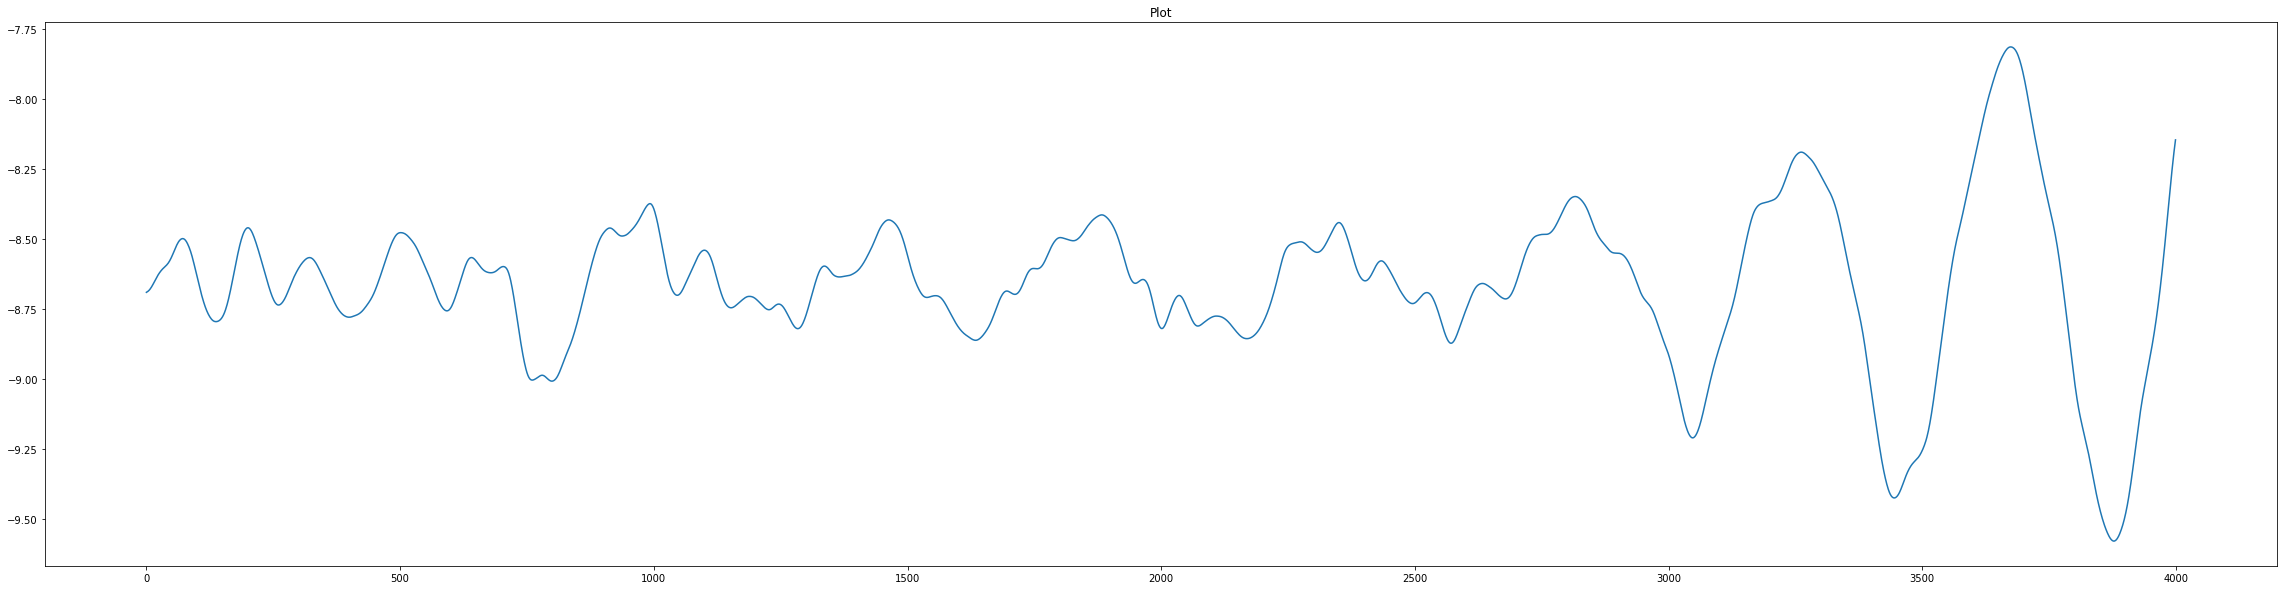

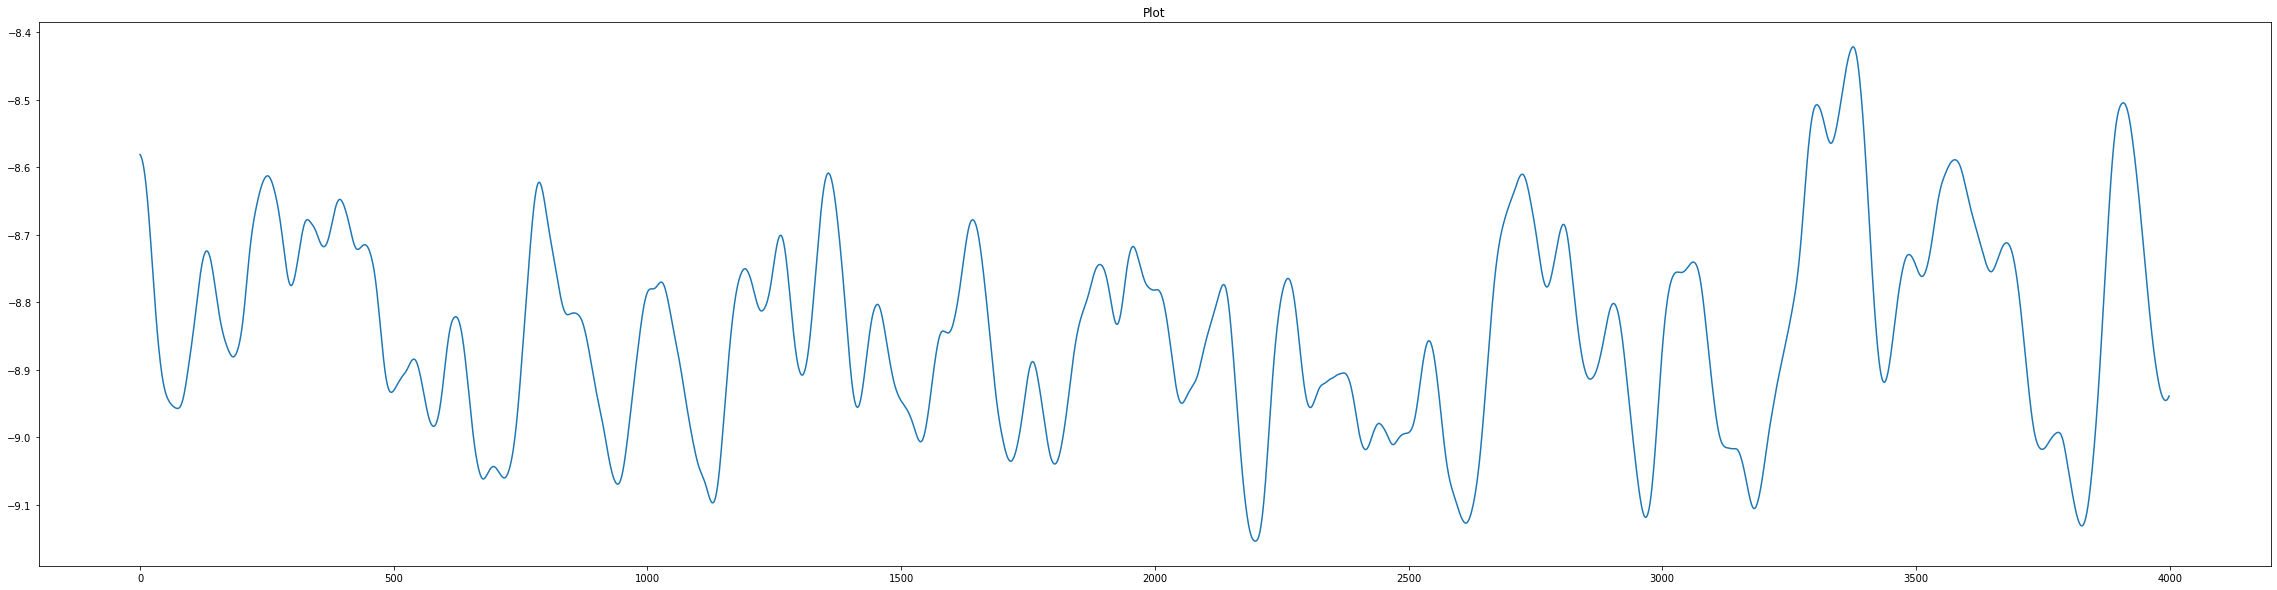

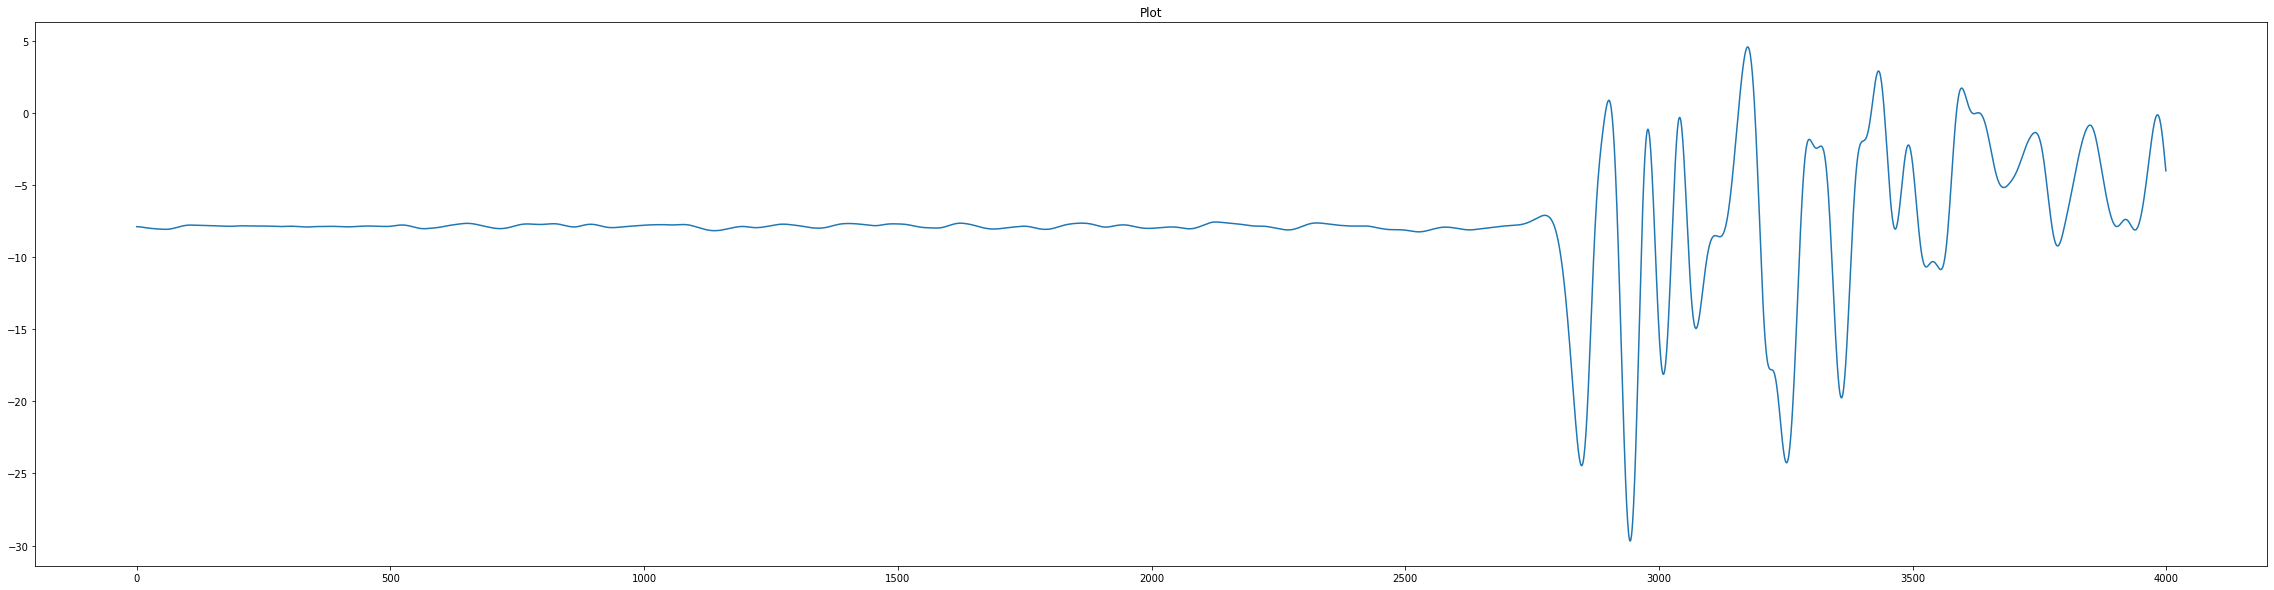

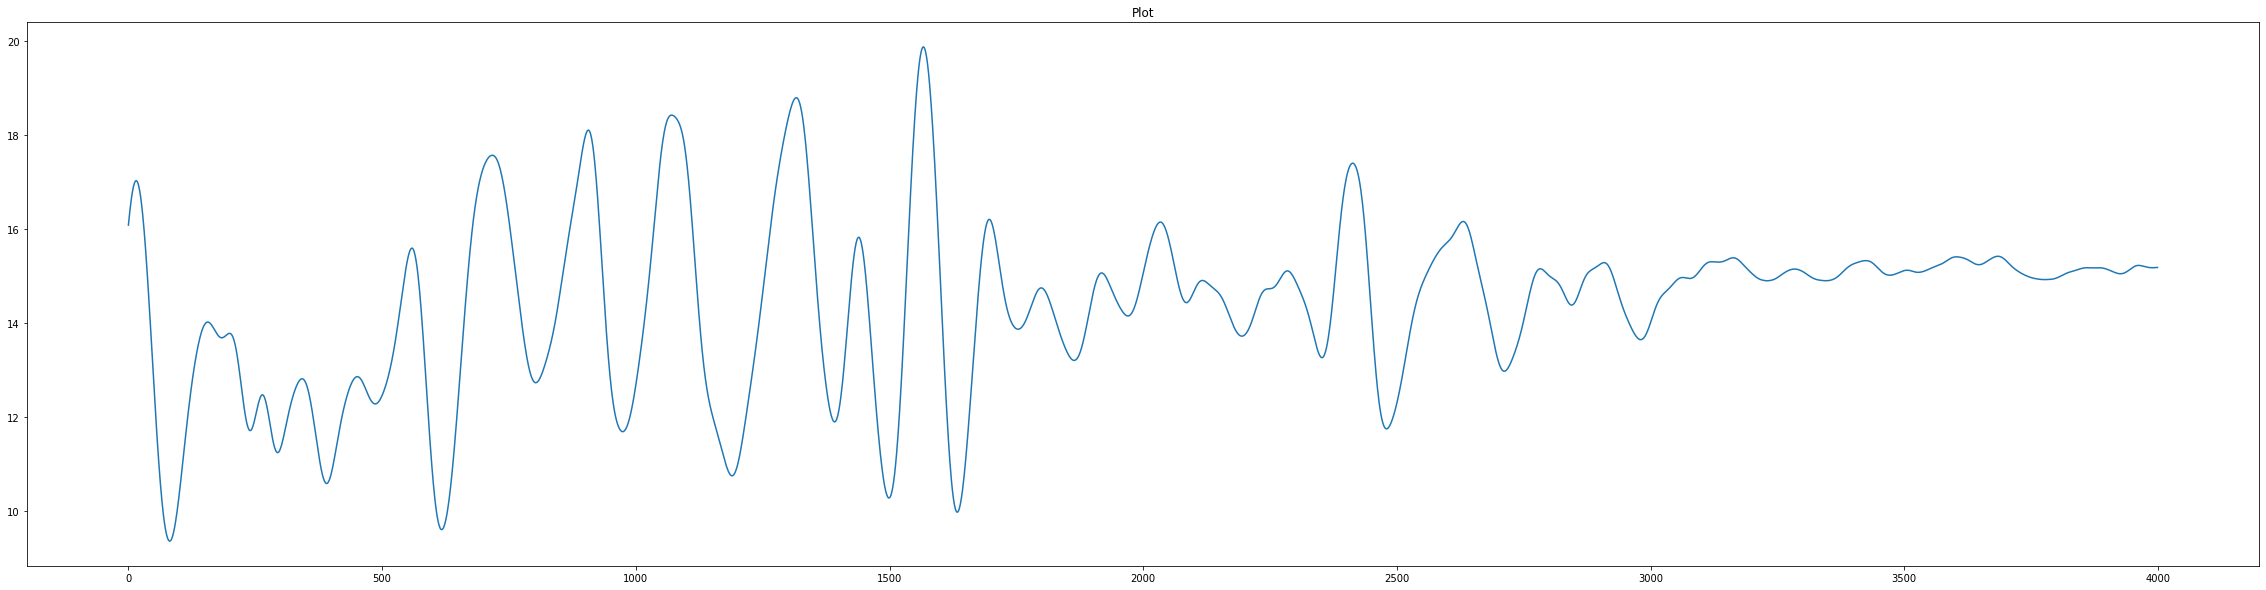

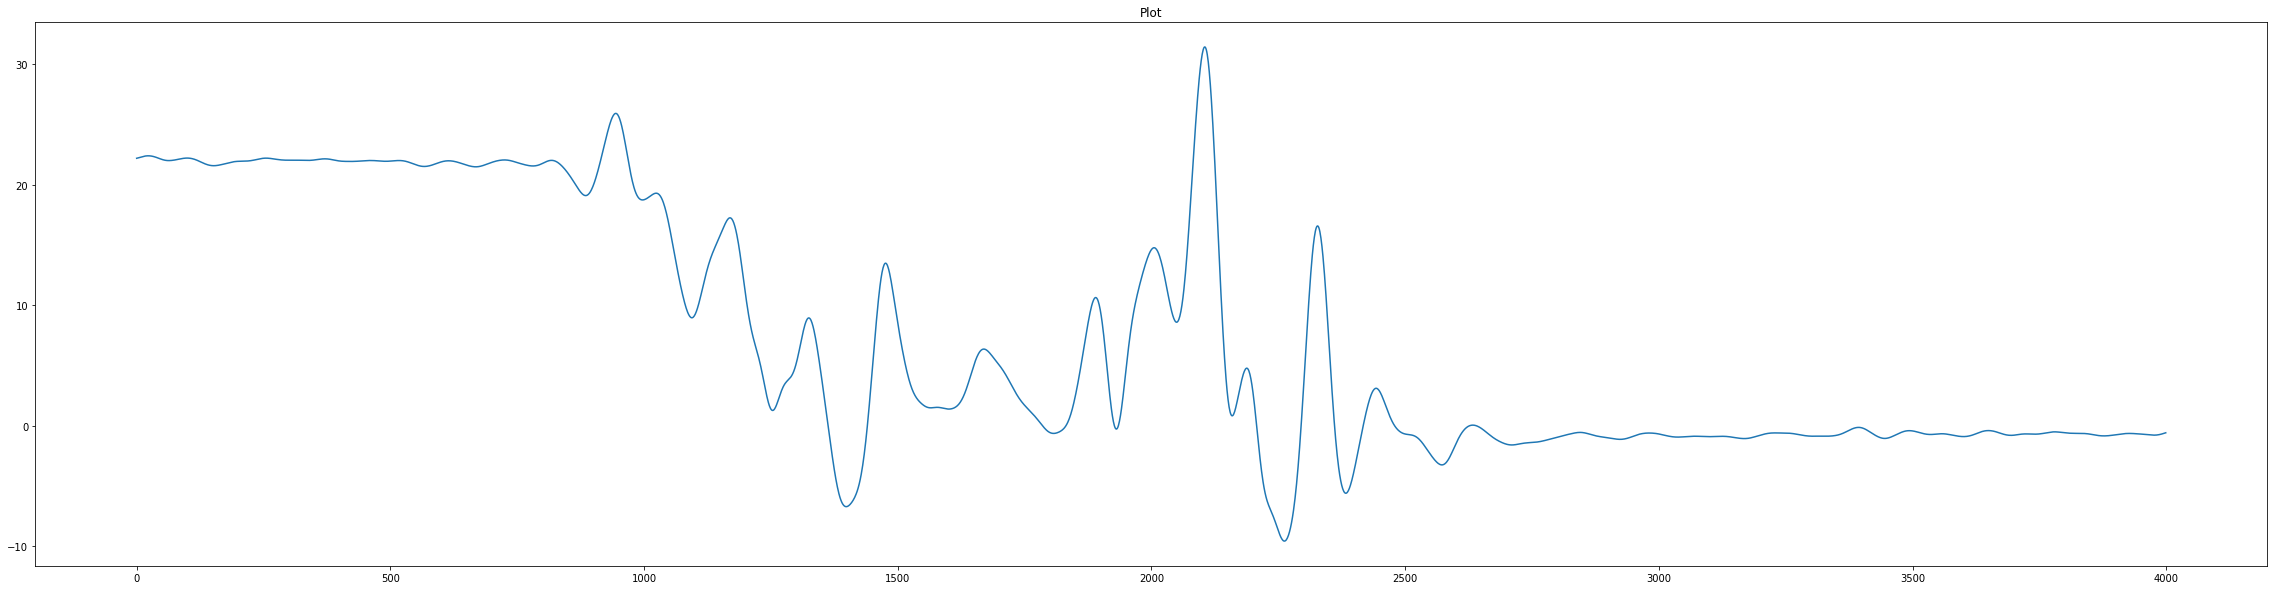

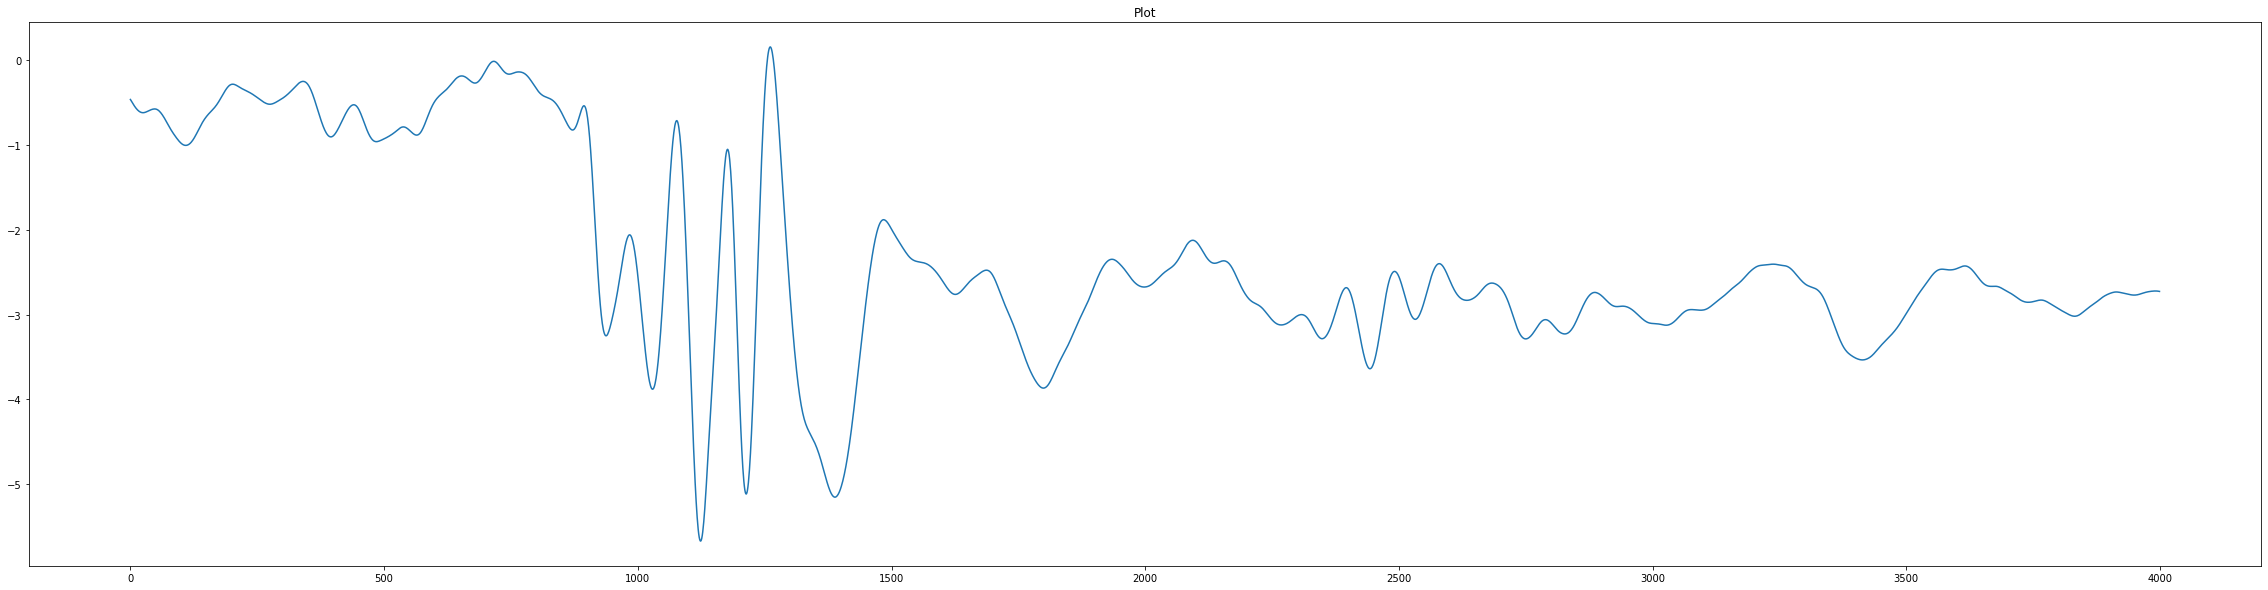

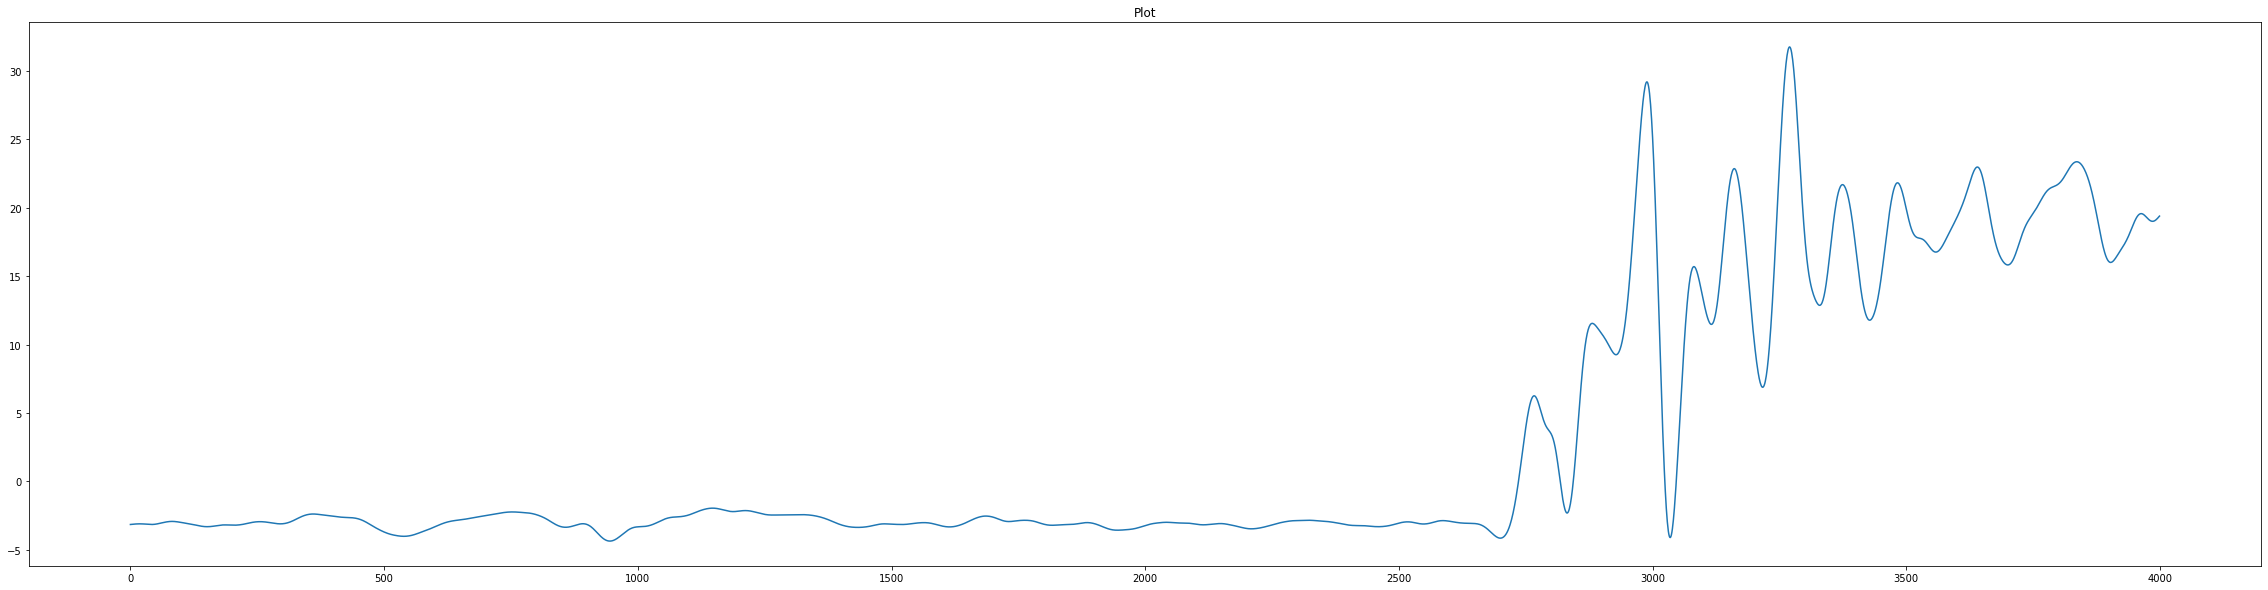

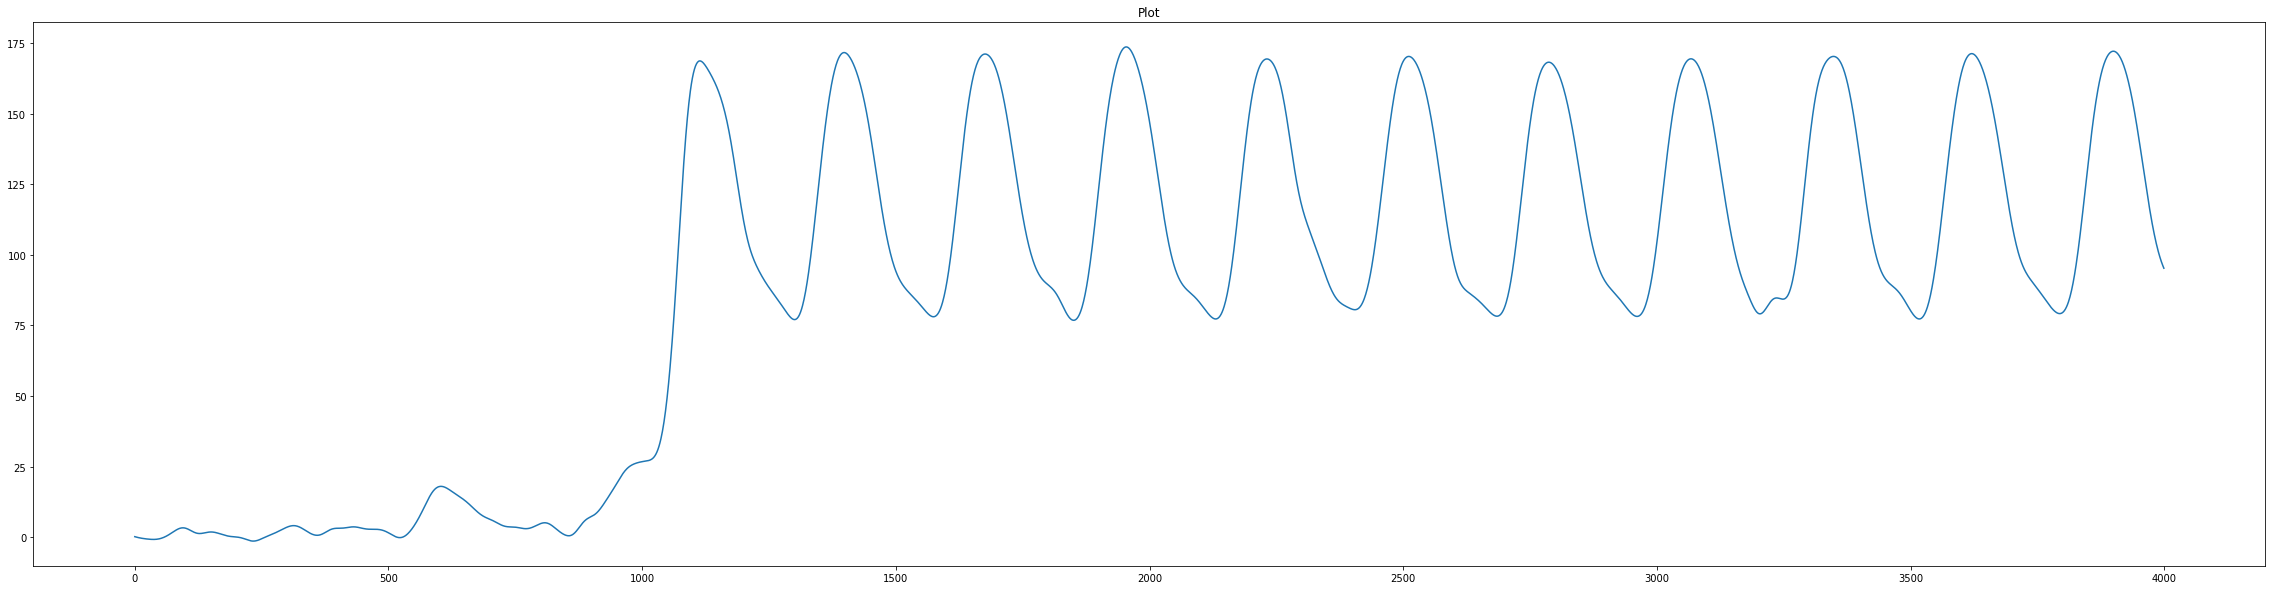

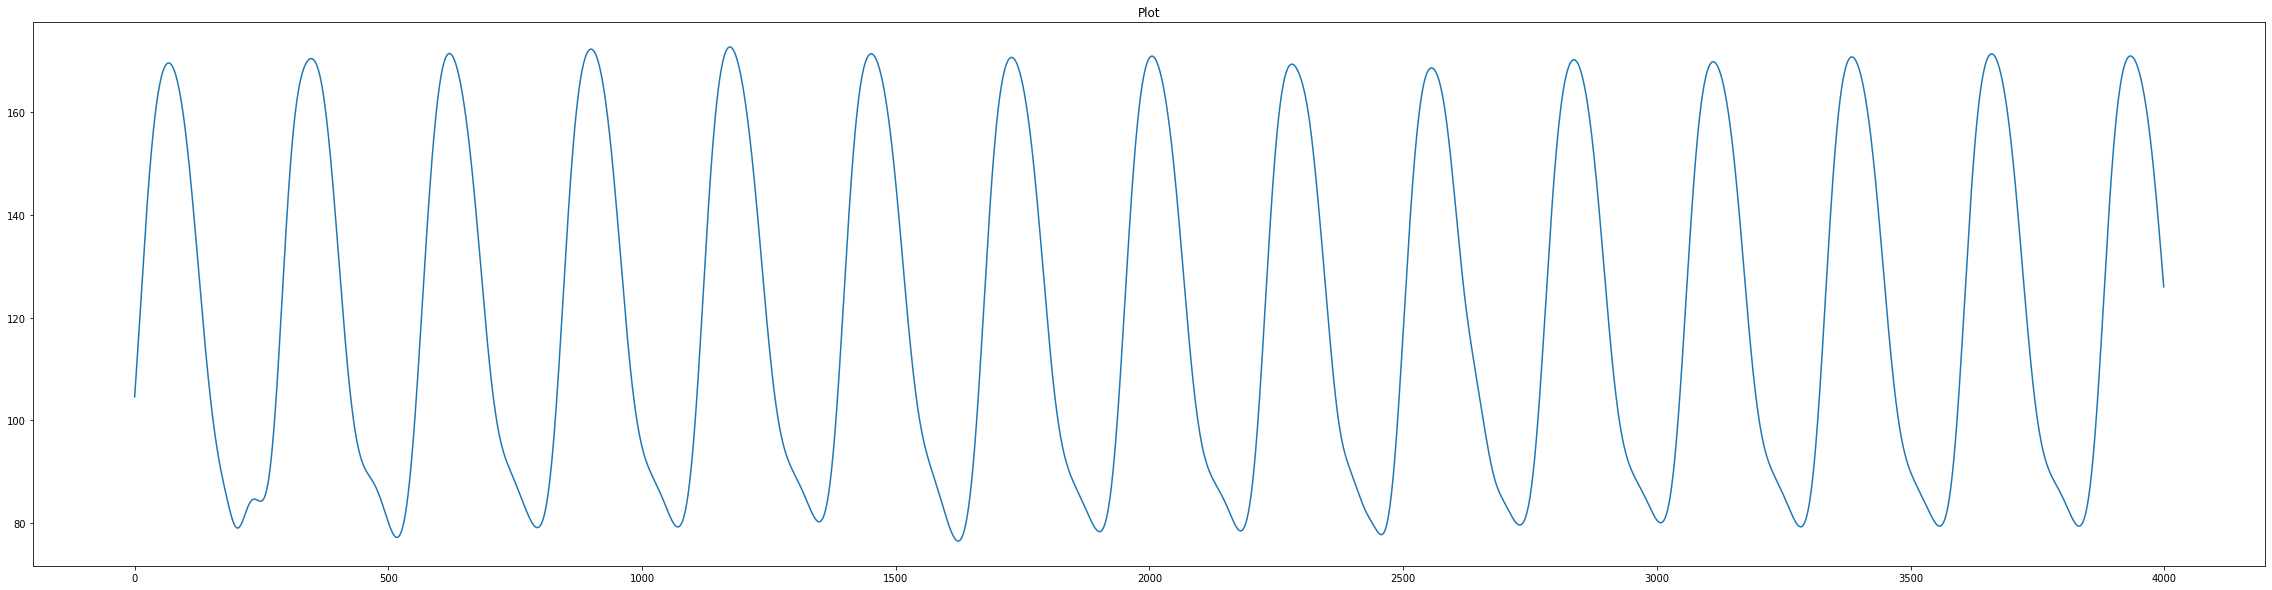

In [17]:
for i in range(1,10):
    plot_time_series(sample_windows[i])

Filter windows with bad extremes

In [18]:
max_pressure = 230
min_pressure = 30
sample_windows_filtered = [sample for sample in sample_windows if min(sample) > min_pressure and max(sample) < max_pressure]
pd.DataFrame(sample_windows_filtered)

0           1           2           3           4           5     \
0     104.592851  106.025570  107.483703  108.965021  110.467206  111.987866   
1      80.657028   80.536391   80.429054   80.336137   80.258794   80.198210   
2      87.530499   87.341537   87.148276   86.950805   86.749224   86.543642   
3      98.828940   98.256415   97.707135   97.180424   96.675559   96.191777   
4     157.056302  156.462066  155.846229  155.207776  154.545745  153.859235   
...          ...         ...         ...         ...         ...         ...   
1594  143.886600  145.531536  147.198676  148.884803  150.586612  152.300726   
1595  117.665857  117.520468  117.373378  117.224182  117.072523  116.918081   
1596  194.388525  193.833906  193.259282  192.665100  192.051794  191.419783   
1597  111.650163  111.454173  111.260958  111.071420  110.886519  110.707269   
1598  197.521250  197.195625  196.848661  196.480858  196.092696  195.684628   

            6           7           8           9     ...        3990  \
0     113.524545  115.074738  116.635903  118.205468  ...  136.762214   
1      80.155600   80.132208   80.129303   80.148166  ...  167.785139   
2      86.334183   86.120989   85.904219   85.684053  ...  161.877020   
3      95.728291   95.284291   94.858948   94.451428  ...   80.251971   
4     153.147420  152.409558  151.645000  150.853199  ...   94.245081   
...          ...         ...         ...         ...  ...         ...   
1594  154.023720  155.752148  157.482565  159.211548  ...  203.586451   
1595  116.760577  116.599774  116.435472  116.267509  ...  117.809731   
1596  190.769465  190.101217  189.415387  188.712296  ...  196.216232   
1597  110.534737  110.370041  110.214343  110.068843  ...  119.915701   
1598  195.257078  194.810440  194.345070  193.861289  ...  110.039854   

            3991        3992        3993        3994        3995        3996  \
0     135.585491  134.399784  133.206537  132.007240  130.803427  129.596667   
1     167.377203  166.945889  166.490568  166.010586  165.505285  164.974008   
2     162.663801  163.408211  164.110810  164.772226  165.393148  165.974323   
3      80.733218   81.258722   81.829357   82.445908   83.109063   83.819408   
4      93.828682   93.429063   93.045428   92.676977   92.322902   91.982398   
...          ...         ...         ...         ...         ...         ...   
1594  203.775851  203.930097  204.049852  204.135783  204.188566  204.208877   
1595  117.606769  117.401742  117.195082  116.987268  116.778822  116.570313   
1596  195.773045  195.308461  194.822819  194.316429  193.789578  193.242528   
1597  119.703313  119.483525  119.256323  119.021739  118.779841  118.530742   
1598  110.032107  110.024324  110.016545  110.008811  110.001161  109.993625   

            3997        3998        3999  
0     128.388555  127.180704  125.974739  
1     164.416106  163.830948  163.217925  
2     166.516542  167.020630  167.487439  
3      84.577419   85.383449   86.237728  
4      91.654656   91.338866   91.034217  
...          ...         ...         ...  
1594  204.197393  204.154789  204.081745  
1595  116.362350  116.155581  115.950701  
1596  192.675510  192.088729  191.482361  
1597  118.274595  118.011600  117.741997  
1598  109.986229  109.978998  109.971946  

[1599 rows x 4000 columns]

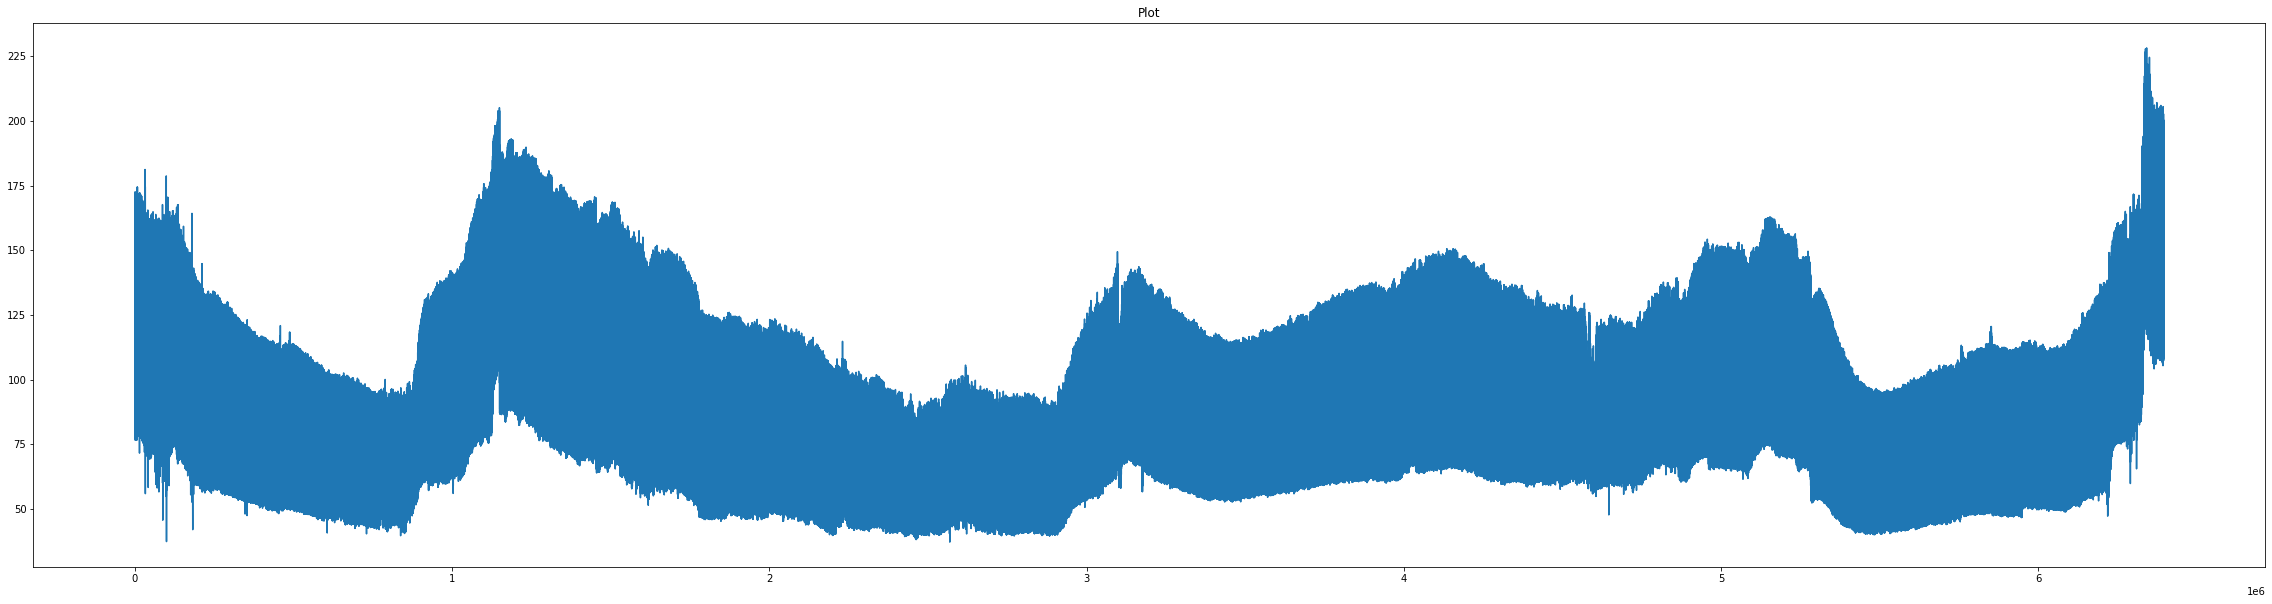

In [19]:
flat = flat_list = [x for xs in sample_windows_filtered for x in xs]
plot_time_series(flat)

In [20]:
# for i, window in enumerate(sample_windows_filtered):
#     plt.figure(figsize=(40,10))
#     plt.title("plot")
#     plt.plot(window)
#     plt.savefig(f'plots/{i}.png')